Importing all the libraries that are mandatory to analize the data

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



In [349]:
#Import the data in a pandas DataFrame
profile_data = pd.read_csv('profiles.csv')

# Functions

In [350]:
# this function creates a bar plot of the distribution of the features
def createBarPlot(feature_counts):
    sns.set(style="whitegrid")
    plt.figure(figsize=(16,6))
    sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")
    plt.ylabel('Count')
    plt.xlabel('Feature')
    plt.xticks(rotation=90)
    plt.title('Distribution of Features')
    plt.show()

# this function convert the height from inches to meters
def convertInchesToMeter(height):
    return height * 0.0254  

# Exploratory Data Analysis

## Reading Dataset

In [351]:
profile_data.info()
profile_data.head()
profile_data.shape
profile_data.columns
profile_data.isnull().sum()
profile_data.nunique()
profile_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The age feature has a maximum of 110, it's possible that this value will be a outlier, there are 2 observations whit this value.
- The height feature has a miniums of 0-5 cm, this is impossible, doesn't exist humans with this height. 
- In the feature location, there are 2 diferents features, state and city.
- The feature pets doesn't have the best data structure. Any observation has its own way to give the information
- The feature sign has more than 12 distinct values, the feature has 48
- The feature speaks has 7647 unique types of value

## Variable Analysis (Univariate)

### Age

C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


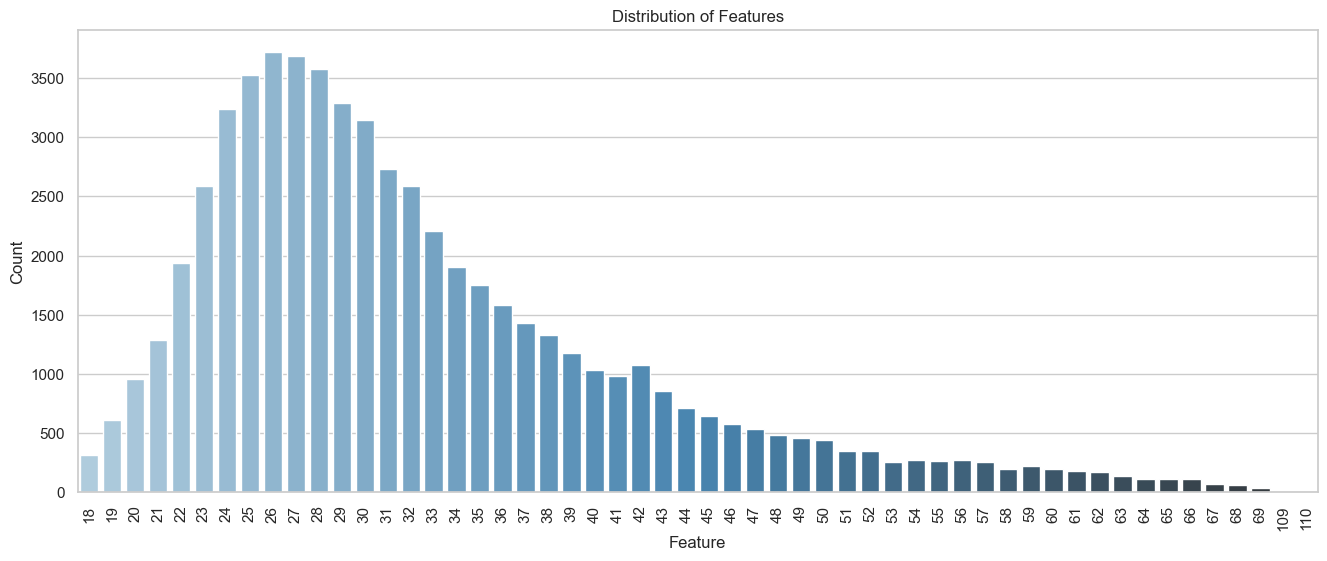

In [352]:
age_counts = profile_data.age.value_counts()
createBarPlot(age_counts)

C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


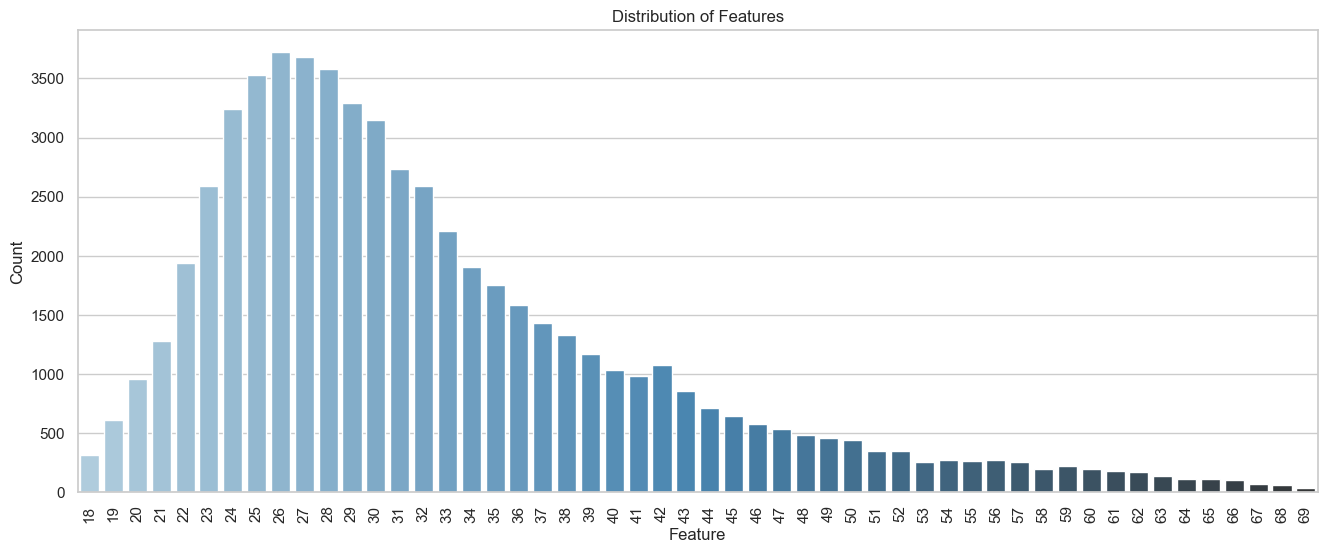

In [353]:
# We can see that there are 1 observation of 110 and another one of 109. We proceed to delete these two observations.
profile_data = profile_data[profile_data.age <= 69]
age_counts = profile_data.age.value_counts()
createBarPlot(age_counts)

In [354]:
miss_age = profile_data['age'].isna().sum()
print('missing age values: ', miss_age)
# doesn't have any missing values

missing age values:  0


### Body Type


C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


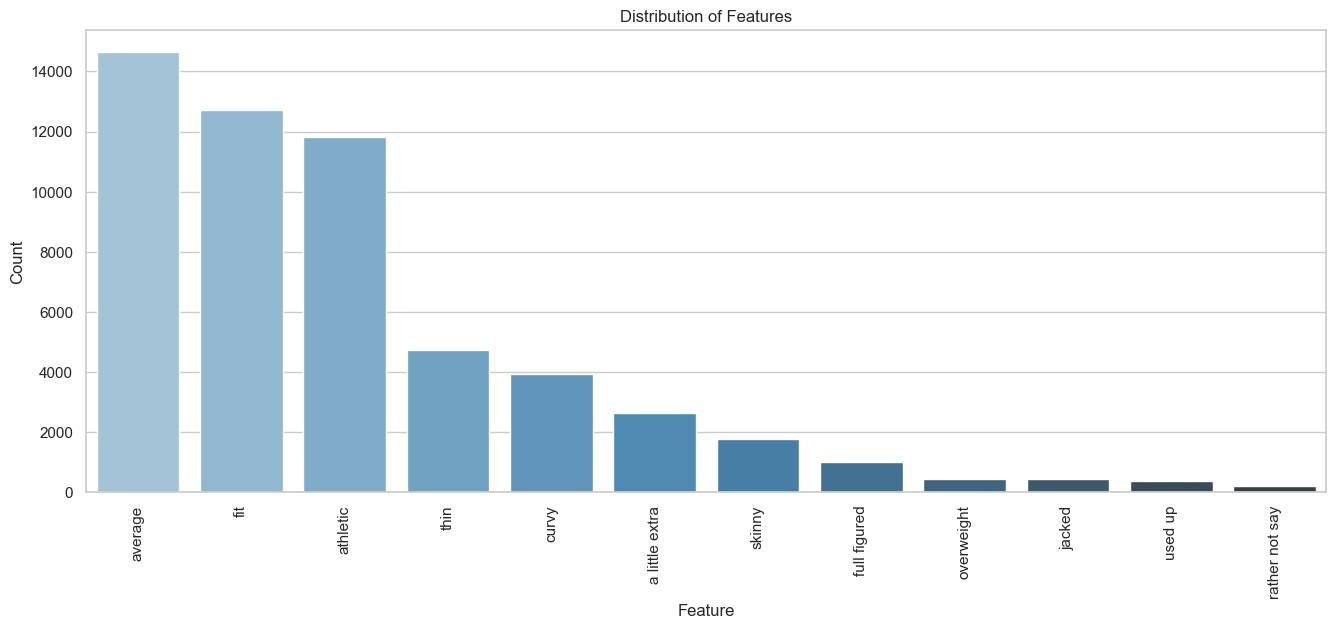

Before manage missing values:  body_type
False    0.911668
True     0.088332
Name: proportion, dtype: float64
After apply the mode technique:  body_type
False    1.0
Name: proportion, dtype: float64


In [355]:
body_type_counts = profile_data['body_type'].value_counts()
createBarPlot(body_type_counts)
miss_age_values_before = profile_data['body_type'].isnull().value_counts(normalize=True)
print('Before manage missing values: ',miss_age_values_before)
#the % of missing values is below the 0.01% threshold, we manage using the mode technique because the impact of the missing values is low. It's possible that the missing values are missing at random. We would use a multiple imputation technique, but we use the mode technique because the missing values are below the 0.01% threshold and we don't won't to spend computational effort.
profile_data['body_type'].fillna(profile_data['body_type'].mode()[0], inplace=True)
miss_age_values_after = profile_data['body_type'].isnull().value_counts(normalize=True)
print('After apply the mode technique: ', miss_age_values_after)

### Height

C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


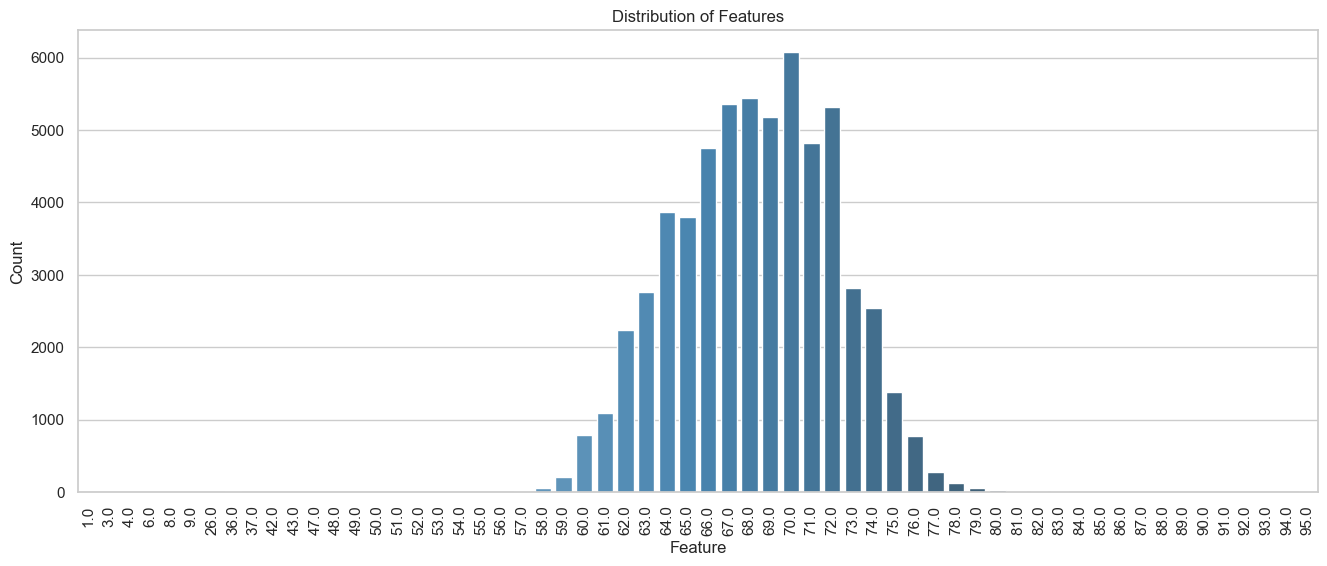

In [356]:
height_counts = profile_data['height'].value_counts()
createBarPlot(height_counts)

In [357]:
# We supose that the value is in inches, that's mean 1 inche is 2.54 cm. First we convert the data in cm unit. 
# Transform the height column to meters
profile_data['height_m'] = profile_data['height'].apply(convertInchesToMeter)
profile_data['height_m'] = round(profile_data['height_m'], 2)
profile_data['height_m'].value_counts().sort_index()
miss_height_m_values_before = profile_data['height_m'].isnull().value_counts(normalize=True)
print('Missing values in height_m: ', miss_height_m_values_before)
# the % of missing values is below the 0.01% threshold, we manage using the mean technique because the impact of the missing values is low. 
profile_data['height_m'].fillna(round(profile_data['height_m'].mean(),2), inplace=True)
miss_height_m_values_after = profile_data['height_m'].isnull().value_counts(normalize=True)
print('After apply the mean technique: ', miss_height_m_values_after)
# We also delete the original feature height
profile_data.drop(columns=['height'], inplace=True)


Missing values in height_m:  height_m
False    0.99995
True     0.00005
Name: proportion, dtype: float64
After apply the mean technique:  height_m
False    1.0
Name: proportion, dtype: float64


C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


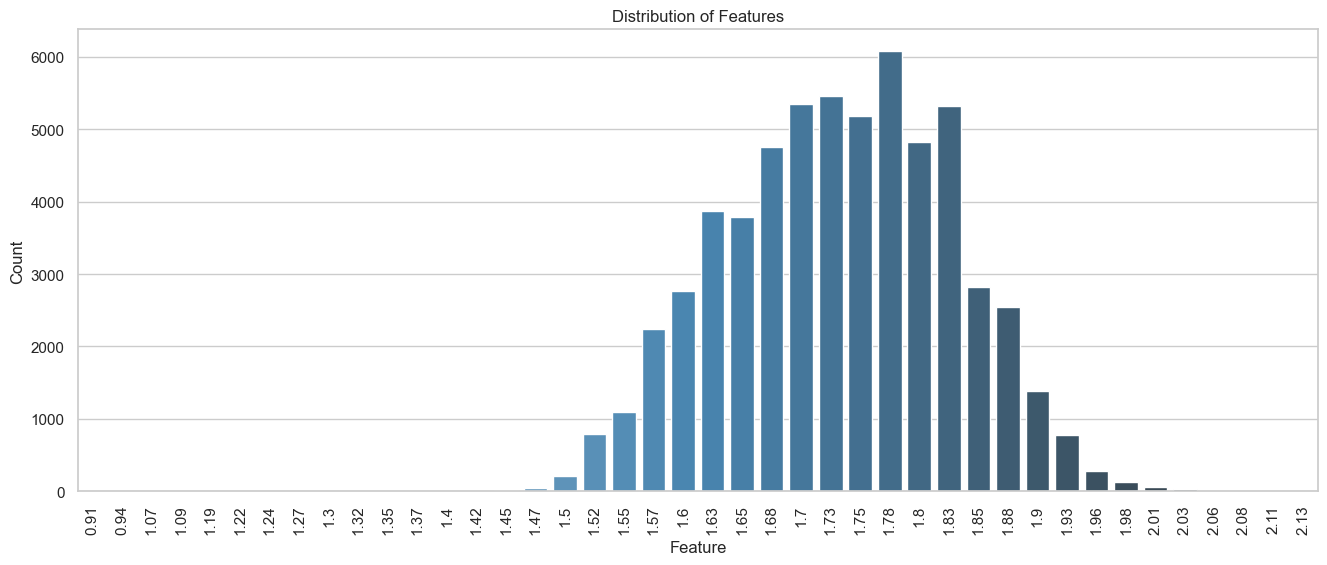

In [358]:
# We decide to delete the outliers cutting up and down the observations of the feature. The cut points are  0.91m and 2.13m
profile_data = profile_data[(profile_data.height_m <= 2.13) & (profile_data.height_m >= 0.91)]
height_counts = profile_data['height_m'].value_counts()
createBarPlot(height_counts)

### Diet

diet
anything                6182
halal                     11
kosher                    11
mostly anything        16574
mostly halal              48
mostly kosher             86
mostly other            1004
mostly vegan             338
mostly vegetarian       3442
other                    331
strictly anything       5111
strictly halal            18
strictly kosher           18
strictly other           450
strictly vegan           228
strictly vegetarian      875
vegan                    136
vegetarian               667
Name: count, dtype: int64


C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


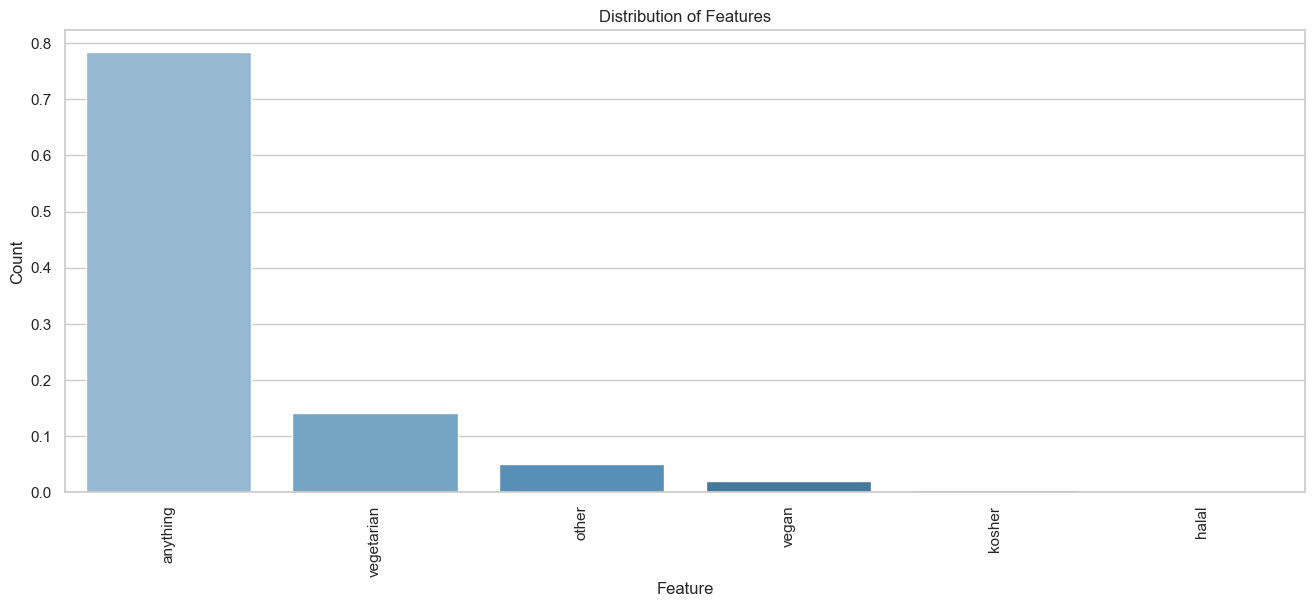

missing values in diet:  diet
False    0.593126
True     0.406874
Name: proportion, dtype: float64
missing values in diet after manage:  diet
False    1.0
Name: proportion, dtype: float64


In [359]:
print(profile_data['diet'].value_counts().sort_index())
# we decide to merge mostly and strictly values into one category
profile_data['diet'] = profile_data['diet'].replace('mostly kosher', 'kosher')
profile_data['diet'] = profile_data['diet'].replace('strictly kosher', 'kosher')
profile_data['diet'] = profile_data['diet'].replace('mostly halal', 'halal')
profile_data['diet'] = profile_data['diet'].replace('strictly halal', 'halal')
profile_data['diet'] = profile_data['diet'].replace('mostly vegan', 'vegan')
profile_data['diet'] = profile_data['diet'].replace('strictly vegan', 'vegan')
profile_data['diet'] = profile_data['diet'].replace('mostly vegetarian', 'vegetarian')
profile_data['diet'] = profile_data['diet'].replace('strictly vegetarian', 'vegetarian')
profile_data['diet'] = profile_data['diet'].replace('mostly other', 'other')
profile_data['diet'] = profile_data['diet'].replace('strictly other', 'other')
profile_data['diet'] = profile_data['diet'].replace('mostly anything', 'anything')
profile_data['diet'] = profile_data['diet'].replace('strictly anything', 'anything')
diet_counts = profile_data['diet'].value_counts(normalize=True)
createBarPlot(diet_counts)
miss_diet_values_before = profile_data['diet'].isnull().value_counts(normalize=True)
print('missing values in diet: ', miss_diet_values_before)
# more than 40% of the values are missing, we decide to create a new category called 'missing'. We are not sure if this missing values al MAR. MCAR or MNAR, for this reason we decide to create a new category.
profile_data['diet'].fillna('missing', inplace=True)
miss_diet_values_after = profile_data['diet'].isnull().value_counts(normalize=True)
print('missing values in diet after manage: ', miss_diet_values_after)

### Drinks

In [360]:
print(profile_data['drinks'].value_counts().sort_index())
print(profile_data['drinks'].describe())
miss_drinks_values_before = profile_data['drinks'].isnull().value_counts(normalize=True)
print('missing values in drinks: ', miss_drinks_values_before)
# below 5% of the values are missing, we decide to fill the missing values with the mode. It's possible that the missing values are MNAR, but we can't be sure. How it is a relative low % of missing values we decide to use the mode technique.
profile_data['drinks'].fillna(profile_data['drinks'].mode()[0], inplace=True)
miss_drinks_values_after = profile_data['drinks'].isnull().value_counts(normalize=True)
print('missing values in drinks after manage: ', miss_drinks_values_after)

drinks
desperately      317
not at all      3264
often           5157
rarely          5954
socially       41764
very often       469
Name: count, dtype: int64
count        56925
unique           6
top       socially
freq         41764
Name: drinks, dtype: object
missing values in drinks:  drinks
False    0.950286
True     0.049714
Name: proportion, dtype: float64
missing values in drinks after manage:  drinks
False    1.0
Name: proportion, dtype: float64


### Drugs

In [361]:
print(profile_data['drugs'].value_counts().sort_index())
miss_drugs_values_before = profile_data['drugs'].isnull().value_counts(normalize=True)
print('missing values in drugs: ', miss_drugs_values_before)
# a 23% don't want to say if they use drugs, we decide to create a new category called 'missing'. Probabily this missing values are MNAR because the people don't want to say if they use drugs. We can't be sure, for this reason we decide to create a new category because the % is high and we don't want to lose the distribution of the data using a mode technique.
profile_data['drugs'].fillna('missing', inplace=True)
miss_drugs_values_after = profile_data['drugs'].isnull().value_counts(normalize=True)
print('missing values in drugs after manage: ', miss_drugs_values_after)

drugs
never        37704
often          405
sometimes     7726
Name: count, dtype: int64
missing values in drugs:  drugs
False    0.765154
True     0.234846
Name: proportion, dtype: float64
missing values in drugs after manage:  drugs
False    1.0
Name: proportion, dtype: float64


### Education

In [362]:
print(profile_data['education'].value_counts(normalize=True).sort_index())

education
college/university                   0.014996
dropped out of college/university    0.018675
dropped out of high school           0.001896
dropped out of law school            0.000319
dropped out of masters program       0.002628
dropped out of med school            0.000225
dropped out of ph.d program          0.002365
dropped out of space camp            0.009741
dropped out of two-year college      0.003585
graduated from college/university    0.449485
graduated from high school           0.026745
graduated from law school            0.021039
graduated from masters program       0.168127
graduated from med school            0.008371
graduated from ph.d program          0.023855
graduated from space camp            0.012312
graduated from two-year college      0.028716
high school                          0.001783
law school                           0.000357
masters program                      0.002553
med school                           0.000206
ph.d program            

education
college/university    0.571648
masters program       0.202248
two-year college      0.053021
ph.d program          0.042773
dropped out           0.039432
high school           0.030161
law school            0.026445
space camp            0.021715
med school            0.012556
Name: proportion, dtype: float64


C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3381711066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="Blues_d")


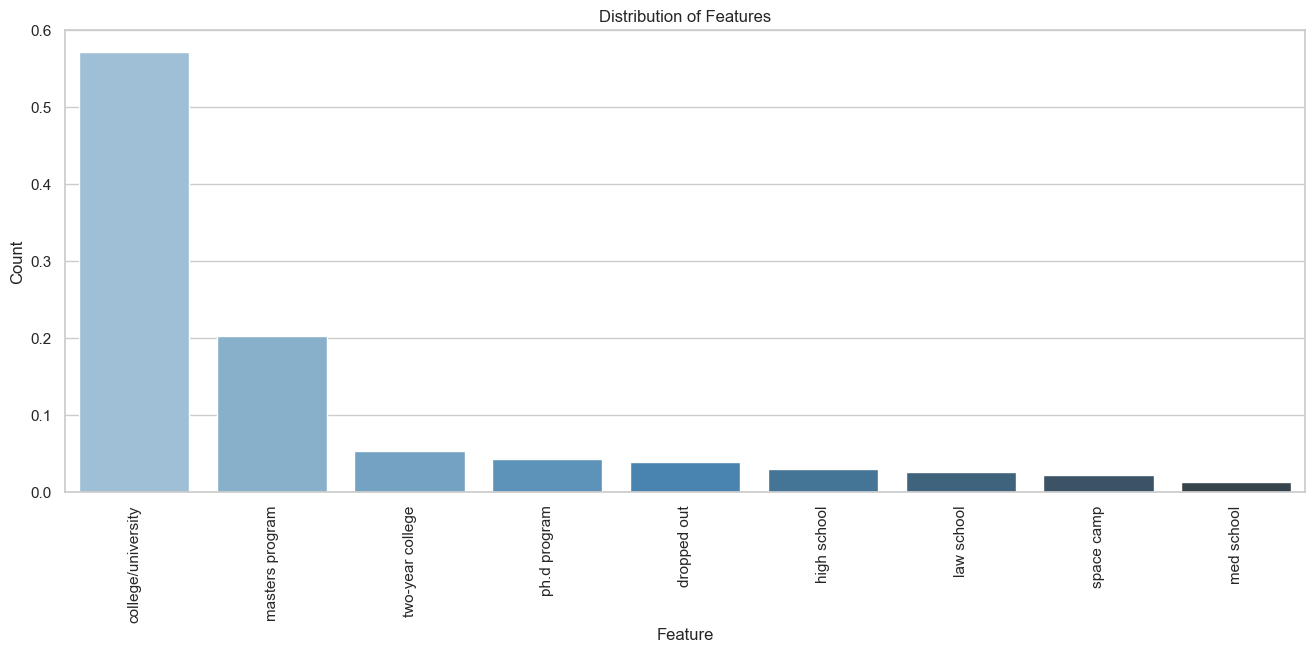

missing values in education:  education
False    0.889455
True     0.110545
Name: proportion, dtype: float64
missing values in education after manage:  education
False    1.0
Name: proportion, dtype: float64


In [363]:
# We need to homogenize the 32 type of values for this feature. We decide to merge all the dropped out in one type of value. Also, we have decided to delete the verbs working and graduated and assign all the values in the same type. This column finally will have 9 types: college/university, high school, law school,  masters program, med school, ph.d program, space camp, two-year college, dropped out.
profile_data['education'] = profile_data['education'].replace('graduated from college/university', 'college/university')
profile_data['education'] = profile_data['education'].replace('graduated from masters program', 'masters program')
profile_data['education'] = profile_data['education'].replace('graduated from ph.d program', 'ph.d program')
profile_data['education'] = profile_data['education'].replace('graduated from law school', 'law school')
profile_data['education'] = profile_data['education'].replace('graduated from med school', 'med school')
profile_data['education'] = profile_data['education'].replace('graduated from space camp', 'space camp')
profile_data['education'] = profile_data['education'].replace('graduated from two-year college', 'two-year college')
profile_data['education'] = profile_data['education'].replace('graduated from high school', 'high school')
profile_data['education'] = profile_data['education'].replace('working on college/university', 'college/university')
profile_data['education'] = profile_data['education'].replace('working on masters program', 'masters program')
profile_data['education'] = profile_data['education'].replace('working on ph.d program', 'ph.d program')
profile_data['education'] = profile_data['education'].replace('working on law school', 'law school')
profile_data['education'] = profile_data['education'].replace('working on med school', 'med school')
profile_data['education'] = profile_data['education'].replace('working on space camp', 'space camp')
profile_data['education'] = profile_data['education'].replace('working on two-year college', 'two-year college')
profile_data['education'] = profile_data['education'].replace('working on high school', 'high school')
profile_data['education'] = profile_data['education'].replace('dropped out of college/university', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of space camp', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of two-year college', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of masters program', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of ph.d program', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of law school', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of med school', 'dropped out')
profile_data['education'] = profile_data['education'].replace('dropped out of high school', 'dropped out')
education_counts = profile_data['education'].value_counts(normalize=True)
print(education_counts)
createBarPlot(education_counts)

miss_education_values_before = profile_data['education'].isnull().value_counts(normalize=True)
print('missing values in education: ', miss_education_values_before)
# 11% of the values, we can't to know it these missing values are MNAR, MAR, MCAR, but the % is not too high, for this reason in this case we will apply the random sample imputation technique
random_sample_imputer = profile_data['education'].dropna().sample(profile_data['education'].isnull().sum(), random_state=0)
random_sample_imputer.index = profile_data[profile_data['education'].isnull()].index
profile_data.loc[profile_data['education'].isnull(), 'education'] = random_sample_imputer
miss_education_values_afeter = profile_data['education'].isnull().value_counts(normalize=True)
print('missing values in education after manage: ', miss_education_values_afeter)


### Ethnicity

In [364]:
profile_data['ethnicity'].value_counts(normalize=True).sort_index()
miss_ethnicity_values_before = profile_data['ethnicity'].isnull().value_counts(normalize=True)
print('missing ethnicity values before manage: ', miss_ethnicity_values_before)
# 9% of the values are missings,  we can't to know it these missing values are MNAR, MAR, MCAR, but the % is not too high, for this reason in this case we will apply the random sample imputation technique
random_sample_imputer_eth = profile_data['ethnicity'].dropna().sample(profile_data['ethnicity'].isnull().sum(), random_state=0)
random_sample_imputer_eth.index = profile_data[profile_data['ethnicity'].isnull()].index
profile_data.loc[profile_data['ethnicity'].isnull(), 'ethnicity'] = random_sample_imputer_eth
miss_ethnicity_values_after = profile_data['ethnicity'].isnull().value_counts(normalize=True)
print('missing ethnicity values after manage: ', miss_ethnicity_values_after)

missing ethnicity values before manage:  ethnicity
False    0.905314
True     0.094686
Name: proportion, dtype: float64
missing ethnicity values after manage:  ethnicity
False    1.0
Name: proportion, dtype: float64


### Income

In [365]:
profile_data['income'].value_counts(normalize=True).sort_index()

income
-1          0.808273
 20000      0.049213
 30000      0.017478
 40000      0.016777
 50000      0.016260
 60000      0.012287
 70000      0.011802
 80000      0.018530
 100000     0.027060
 150000     0.010500
 250000     0.002487
 500000     0.000801
 1000000    0.008530
Name: proportion, dtype: float64

In [366]:
# More than 80% are -1 values, we will drop this column
profile_data = profile_data.drop(columns=['income'], axis=1)

### Job

job
artistic / musical / writer          0.085776
banking / financial / real estate    0.043797
clerical / administrative            0.015566
computer / hardware / software       0.090997
construction / craftsmanship         0.019723
education / academia                 0.067890
entertainment / media                0.043468
executive / management               0.045885
hospitality / travel                 0.026375
law / legal services                 0.026684
medicine / health                    0.071139
military                             0.003925
other                                0.146647
political / government               0.013690
rather not say                       0.008373
retired                              0.004834
sales / marketing / biz dev          0.084887
science / tech / engineering         0.093685
student                              0.094323
transportation                       0.007077
unemployed                           0.005259
Name: proportion, dtype: float

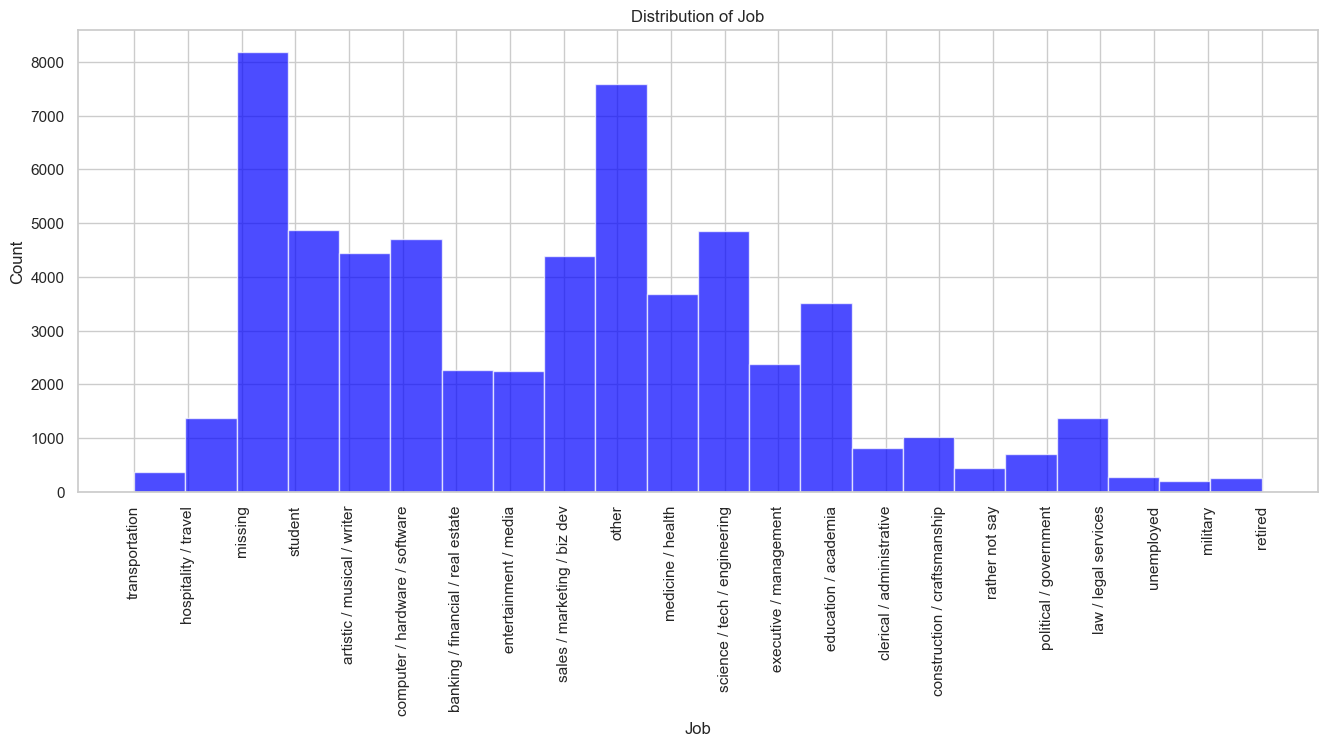

In [367]:
print(profile_data['job'].value_counts(normalize=True).sort_index())
miss_job_values_before = profile_data['job'].isnull().value_counts(normalize=True)
print('missing job values before manage: ', miss_job_values_before)
# 8% of the values are missing, we can't suposue that the missing values are MNAR because some people don't want to say their job. We decide to create a new category called 'missing' to manage the missing values.
profile_data['job'].fillna('missing', inplace=True)
miss_job_values_after = profile_data['job'].isnull().value_counts(normalize=True)
print('missing job values after manage: ', miss_job_values_after)
plt.figure(figsize=(16,6))
plt.hist(profile_data['job'], bins=22, color='blue', alpha=0.7)
plt.xlabel('Job')  
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Job')
plt.show()

# 

### Location

In [368]:
profile_data['location'].value_counts(normalize=True).sort_index()
miss_location_values_before = profile_data['location'].isnull().value_counts(normalize=True)
print('missing location values before manage: ', miss_location_values_before)
# this feature doesn't have any missing value, but, the feature has different information in one cell that we devide in the next way: city and state
profile_data['city'] = profile_data['location'].str.split(',').str[0]
profile_data['state'] = profile_data['location'].str.split(',').str[1]
profile_data = profile_data.drop(columns=['location'], axis=1)

missing location values before manage:  location
False    1.0
Name: proportion, dtype: float64


### Offspring

In [369]:
profile_data['offspring'].value_counts(normalize=True).sort_index()
miss_offspring_values_before = profile_data['offspring'].isnull().value_counts(normalize=True)
print('missing offspring values before manage: ', miss_offspring_values_before)
# A 59% of the data is missing, we decide to drop this column
profile_data = profile_data.drop(columns=['offspring'], axis=1)

missing offspring values before manage:  offspring
True     0.593109
False    0.406891
Name: proportion, dtype: float64


### Orientation

In [370]:
profile_data['orientation'].value_counts(normalize=True).sort_index()
miss_orientation_values_before = profile_data['orientation'].isnull().value_counts(normalize=True)
print('missing orientation values before manage: ', miss_orientation_values_before)
# we decide to let this column as it is

missing orientation values before manage:  orientation
False    1.0
Name: proportion, dtype: float64


### Pets

missing pets values before manage:  pets
False    0.667696
True     0.332304
Name: proportion, dtype: float64
missing pets values after manage:  pets
False    1.0
Name: proportion, dtype: float64


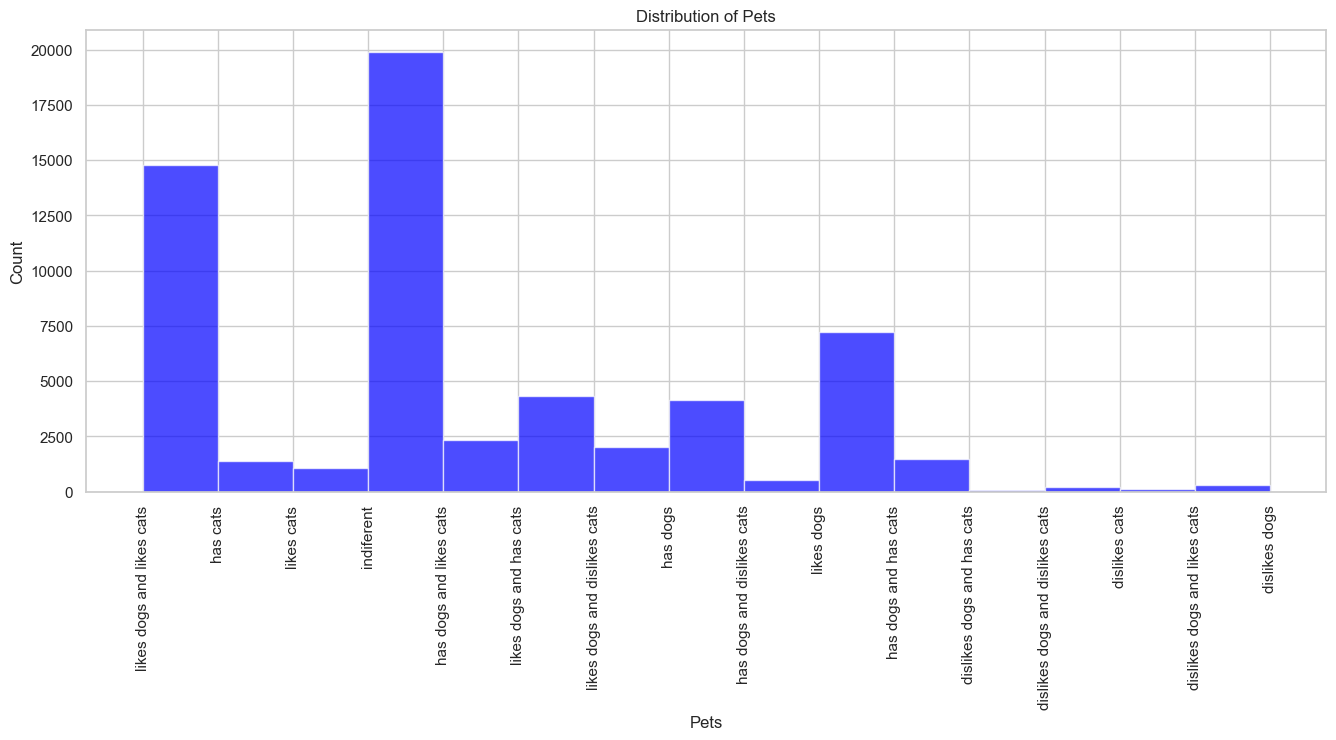

In [371]:
profile_data['pets'].value_counts(normalize=True).sort_index()
miss_pets_values_before = profile_data['pets'].isnull().value_counts(normalize=True)
print('missing pets values before manage: ', miss_pets_values_before)
# 33% of the data is missing, we decide to drop this column, we can't be sure if the missing values are MNAR, MAR, MCAR but we supose that people that missing this feature is because they don't have pets and they don't give importance to this matter. We decide to create a new category called 'indiferent' to manage the missing values.
profile_data['pets'].fillna('indiferent', inplace=True)
miss_pets_values_after = profile_data['pets'].isnull().value_counts(normalize=True)
print('missing pets values after manage: ', miss_pets_values_after)
plt.figure(figsize=(16,6))
plt.hist(profile_data['pets'].dropna(), bins=15, color='blue', alpha=0.7)
plt.xlabel('Pets')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Pets')
plt.show()

### Religion

In [372]:
profile_data['religion'].value_counts(normalize=True).sort_index()
# we homoniginize the religion column merging all the values that contain 'agnosticism' into one category, and the same for 'atheism' and the other values, but we decide to create a new category of laughing about religion
profile_data['religion'] = profile_data['religion'].replace('agnosticism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('agnosticism but not too serious about it', 'agnosticism')
profile_data['religion'] = profile_data['religion'].replace('agnosticism and somewhat serious about it', 'agnosticism')
profile_data['religion'] = profile_data['religion'].replace('agnosticism and very serious about it', 'agnosticism')
profile_data['religion'] = profile_data['religion'].replace('atheism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('atheism but not too serious about it', 'atheism')
profile_data['religion'] = profile_data['religion'].replace('atheism and somewhat serious about it', 'atheism')
profile_data['religion'] = profile_data['religion'].replace('atheism and very serious about it', 'atheism')
profile_data['religion'] = profile_data['religion'].replace('christianity but not too serious about it', 'christianity')
profile_data['religion'] = profile_data['religion'].replace('christianity and somewhat serious about it', 'christianity')
profile_data['religion'] = profile_data['religion'].replace('christianity and very serious about it', 'christianity')
profile_data['religion'] = profile_data['religion'].replace('christianity and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('other and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('other but not too serious about it', 'other')
profile_data['religion'] = profile_data['religion'].replace('other and somewhat serious about it', 'other')
profile_data['religion'] = profile_data['religion'].replace('other and very serious about it', 'other')
profile_data['religion'] = profile_data['religion'].replace('catholicism but not too serious about it', 'catholicism')
profile_data['religion'] = profile_data['religion'].replace('catholicism and somewhat serious about it', 'catholicism')
profile_data['religion'] = profile_data['religion'].replace('catholicism and very serious about it', 'catholicism')
profile_data['religion'] = profile_data['religion'].replace('catholicism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('judaism but not too serious about it', 'judaism')
profile_data['religion'] = profile_data['religion'].replace('judaism and somewhat serious about it', 'judaism')
profile_data['religion'] = profile_data['religion'].replace('judaism and very serious about it', 'judaism')
profile_data['religion'] = profile_data['religion'].replace('judaism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('buddhism but not too serious about it', 'buddhism')
profile_data['religion'] = profile_data['religion'].replace('buddhism and somewhat serious about it', 'buddhism')
profile_data['religion'] = profile_data['religion'].replace('buddhism and very serious about it', 'buddhism')
profile_data['religion'] = profile_data['religion'].replace('buddhism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('hinduism but not too serious about it', 'hinduism')
profile_data['religion'] = profile_data['religion'].replace('hinduism and somewhat serious about it', 'hinduism')
profile_data['religion'] = profile_data['religion'].replace('hinduism and very serious about it', 'hinduism')
profile_data['religion'] = profile_data['religion'].replace('hinduism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('islam but not too serious about it', 'islam')
profile_data['religion'] = profile_data['religion'].replace('islam and somewhat serious about it', 'islam')
profile_data['religion'] = profile_data['religion'].replace('islam and very serious about it', 'islam')
profile_data['religion'] = profile_data['religion'].replace('islam and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('atheism and laughing about it', 'laughing about religion')
profile_data['religion'] = profile_data['religion'].replace('atheism but not too serious about it', 'atheism')
profile_data['religion'] = profile_data['religion'].replace('atheism and somewhat serious about it', 'atheism')
profile_data['religion'] = profile_data['religion'].replace('atheism and very serious about it', 'atheism')

profile_data['religion'].value_counts(normalize=True).sort_index()
miss_religion_values_before = profile_data['religion'].isnull().value_counts(normalize=True)
print('missing religion values before manage: ', miss_religion_values_before)
# 33% of the data is missing, we thing that there are MNAR, for this reason we decide to create a new category called 'missing' to manage the missing values.
profile_data['religion'].fillna('missing', inplace=True)
miss_religion_values_after = profile_data['religion'].isnull().value_counts(normalize=True)
print('missing religion values after manage: ', miss_religion_values_after)


missing religion values before manage:  religion
False    0.662588
True     0.337412
Name: proportion, dtype: float64
missing religion values after manage:  religion
False    1.0
Name: proportion, dtype: float64


### Sex

In [373]:
profile_data['sex'].value_counts(normalize=True).sort_index()
miss_sex_values_before = profile_data['sex'].isnull().value_counts(normalize=True)
print('missing sex values before: ', miss_sex_values_before)
# Doesn't exist missing values. But we decide to change the values of f and m for a 0 and 1 values to make the data more readable.
profile_data['sex'] = profile_data['sex'].apply(lambda x: 1 if x == 'm' else 0)

missing sex values before:  sex
False    1.0
Name: proportion, dtype: float64


### Sign

In [374]:
profile_data['sign'].value_counts(normalize=True).sort_index()
miss_sign_values_before = profile_data['sign'].isnull().value_counts(normalize=True)
print('missing sign values before: ', miss_sign_values_before)
# 18% of the data is missing, we decide to drop this column, we can't be sure if the missing values are MNAR, MAR, MCAR but we supose that people that missing this feature is because they don't have pets and they don't give importance to this matter. We decide to create a new category called 'indiferent' to manage the missing values.
profile_data['sign'].fillna('indiferent', inplace=True)
miss_sign_values_after = profile_data['sign'].isnull().value_counts(normalize=True)
print('missing sign values after: ', miss_sign_values_after)
profile_data['sign'].unique()
# we decide to simplify the sign column, we only take the first word of the sign column
profile_data['sign'] = profile_data['sign'].str.split(' ').str[0]
print(profile_data['sign'].value_counts(normalize=True).sort_index())
# find only the sign importance in the sign column


missing sign values before:  sign
False    0.815602
True     0.184398
Name: proportion, dtype: float64
missing sign values after:  sign
False    1.0
Name: proportion, dtype: float64
sign
aquarius       0.065506
aries          0.066574
cancer         0.070163
capricorn      0.059613
gemini         0.071900
indiferent     0.184398
leo            0.072985
libra          0.070180
pisces         0.065823
sagittarius    0.065773
scorpio        0.068961
taurus         0.069012
virgo          0.069112
Name: proportion, dtype: float64


### Smokes

In [376]:
profile_data['smokes'].value_counts(normalize=True).sort_index()
miss_smokes_values_before = profile_data['smokes'].isnull().value_counts(normalize=True)
print('missing smokes values before: ', miss_smokes_values_before)
# 9% of the data is missing, it's possible that the missing values are MNAR, for this reason we decide to create a new category called 'missing' to manage the missing values.
profile_data['smokes'].fillna('missing', inplace=True)
miss_smokes_values_after = profile_data['smokes'].isnull().value_counts(normalize=True)
print('missing smokes values after: ', miss_smokes_values_after)
# we decide to let this column as it is

missing smokes values before:  smokes
False    0.908135
True     0.091865
Name: proportion, dtype: float64
missing smokes values after:  smokes
False    1.0
Name: proportion, dtype: float64


### Speaks

In [379]:
profile_data['speaks'].value_counts(normalize=True).sort_index()
profile_data['speaks'].unique()
miss_speaks_values_before = profile_data['speaks'].isnull().value_counts(normalize=True)
print('missing speaks values before: ', miss_speaks_values_before)
# 0.0008 % of the data is missing, we decide to use the mode technique to manage the missing values.
profile_data['speaks'].fillna(profile_data['speaks'].mode()[0], inplace=True)
miss_speaks_values_after = profile_data['speaks'].isnull().value_counts(normalize=True)
print('missing speaks values after: ', miss_speaks_values_after)



missing speaks values before:  speaks
False    0.999165
True     0.000835
Name: proportion, dtype: float64
missing speaks values after:  speaks
False    1.0
Name: proportion, dtype: float64


In [381]:

# we decide to merge and modify the types of value of this feature
languages_data_split = profile_data['speaks'].str.split(',')
languages_data_split_strip = languages_data_split.apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)
languages_data = languages_data_split_strip.str.join('|').str.get_dummies()
# merge the languages that are similar and create a scaled version of the data using normal = 5, fluently=4, okay=3, poorly=2, very poorly = 1, nothing = 0
languages_data_level = pd.DataFrame()
languages_data_level['speak_english'] = (languages_data.get('english')*5 + languages_data.get('english (fluently)')*4 + languages_data.get('english (okay)')*3 + languages_data.get('english (poorly)')*2 + languages_data.get('english (very poorly',0)*1)
languages_data_level['speak_spanish'] = (languages_data.get('spanish')*5 + languages_data.get('spanish (fluently)')*4 + languages_data.get('spanish (okay)')*3 + languages_data.get('spanish (poorly)')*2 + languages_data.get('spanish (very poorly',0)*1)
languages_data_level['speak_french'] = (languages_data.get('french')*5 + languages_data.get('french (fluently)')*4 + languages_data.get('french (okay)')*3 + languages_data.get('french (poorly)')*2 + languages_data.get('french (very poorly',0)*1)
languages_data_level['speak_german'] = (languages_data.get('german')*5 + languages_data.get('german (fluently)')*4 + languages_data.get('german (okay)')*3 + languages_data.get('german (poorly)')*2 + languages_data.get('german (very poorly',0)*1)
languages_data_level['speak_russian'] = (languages_data.get('russian')*5 + languages_data.get('russian (fluently)')*4 + languages_data.get('russian (okay)')*3 + languages_data.get('russian (poorly)')*2 + languages_data.get('russian (very poorly',0)*1)
languages_data_level['speak_italian'] = (languages_data.get('italian')*5 + languages_data.get('italian (fluently)')*4 + languages_data.get('italian (okay)')*3 + languages_data.get('italian (poorly)')*2 + languages_data.get('italian (very poorly',0)*1)
languages_data_level['speak_chinese'] = (languages_data.get('chinese')*5 + languages_data.get('chinese (fluently)')*4 + languages_data.get('chinese (okay)')*3 + languages_data.get('chinese (poorly)')*2 + languages_data.get('chinese (very poorly',0)*1)
languages_data_level['speak_japanese'] = (languages_data.get('japanese')*5 + languages_data.get('japanese (fluently)')*4 + languages_data.get('japanese (okay)')*3 + languages_data.get('japanese (poorly)')*2 + languages_data.get('japanese (very poorly',0)*1)
languages_data_level['speak_portuguese'] = (languages_data.get('portuguese')*5 + languages_data.get('portuguese (fluently)')*4 + languages_data.get('portuguese (okay)')*3 + languages_data.get('portuguese (poorly)')*2 + languages_data.get('portuguese (very poorly',0)*1)
languages_data_level['speak_other'] = (languages_data.get('other')*5 + languages_data.get('other (fluently)')*4 + languages_data.get('other (okay)')*3 + languages_data.get('other (poorly)')*2 + languages_data.get('other (very poorly',0)*1)
languages_data_level['speak_arabic'] = (languages_data.get('arabic')*5 + languages_data.get('arabic (fluently)')*4 + languages_data.get('arabic (okay)')*3 + languages_data.get('arabic (poorly)')*2 + languages_data.get('arabic (very poorly',0)*1)
# merge profile_data with languages_data_level
profile_data = pd.concat([profile_data, languages_data_level], axis=1)
# drop the original speaks column
profile_data = profile_data.drop(columns=['speaks'], axis=1)

### Status

In [382]:
profile_data['status'].value_counts(normalize=True).sort_index()
miss_status_values_before = profile_data['status'].isnull().value_counts(normalize=True)
print('missing status values before: ', miss_status_values_before)
# we decide to let this column as it is

missing status values before:  status
False    1.0
Name: proportion, dtype: float64


## Exploratory Analysis

In [387]:
# check that it doesn't have any missing values except the essay columns
profile_data.info()
# Divide the data into four categories: physics, culture and lifestyle
data_profile_physics = profile_data[['age', 'body_type','height_m','ethnicity','sex']]
data_profile_culture = profile_data[['education', 'job', 'religion', 'sign', 'speak_english', 'speak_spanish', 'speak_french', 'speak_german', 'speak_russian', 'speak_italian', 'speak_chinese', 'speak_japanese', 'speak_portuguese', 'speak_other', 'speak_arabic']]
data_profile_lifestyle = profile_data[['diet', 'pets', 'orientation', 'status', 'drinks', 'drugs', 'smokes']]
data_profile_literacy = profile_data[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']]



<class 'pandas.core.frame.DataFrame'>
Index: 59903 entries, 0 to 59945
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               59903 non-null  int64  
 1   body_type         59903 non-null  object 
 2   diet              59903 non-null  object 
 3   drinks            59903 non-null  object 
 4   drugs             59903 non-null  object 
 5   education         59903 non-null  object 
 6   essay0            54423 non-null  object 
 7   essay1            52339 non-null  object 
 8   essay2            50272 non-null  object 
 9   essay3            48435 non-null  object 
 10  essay4            49373 non-null  object 
 11  essay5            49065 non-null  object 
 12  essay6            46141 non-null  object 
 13  essay7            47462 non-null  object 
 14  essay8            40688 non-null  object 
 15  essay9            47309 non-null  object 
 16  ethnicity         59903 non-null  object 
 17

### Physics variables

                 age body_type      height_m ethnicity           sex
count   59900.000000     59900  59900.000000     54229  59900.000000
unique           NaN        13           NaN       217           NaN
top              NaN   average           NaN     white           NaN
freq             NaN     14651           NaN     32819           NaN
mean       32.339249       NaN      1.734414       NaN      0.597629
std         9.442152       NaN      0.098581       NaN      0.490380
min        18.000000       NaN      0.910000       NaN      0.000000
25%        26.000000       NaN      1.680000       NaN      0.000000
50%        30.000000       NaN      1.730000       NaN      1.000000
75%        37.000000       NaN      1.800000       NaN      1.000000
max        69.000000       NaN      2.130000       NaN      1.000000
age             0
body_type       0
height_m        0
ethnicity    5671
sex             0
dtype: int64
   age       body_type  height_m            ethnicity  sex
0   22  a 

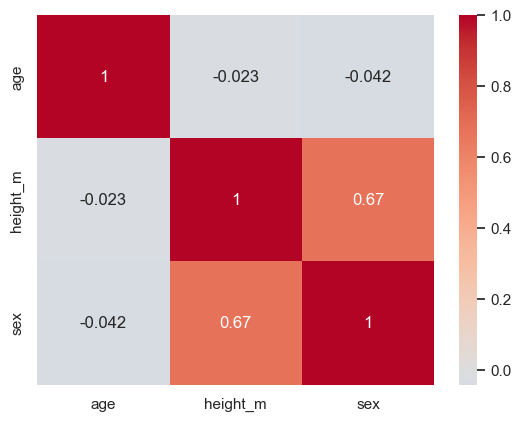

C:\Users\Andreu\AppData\Local\Temp\ipykernel_32872\3176625290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_profile_physics['body_type'] = data_profile_physics['body_type'].astype(str)


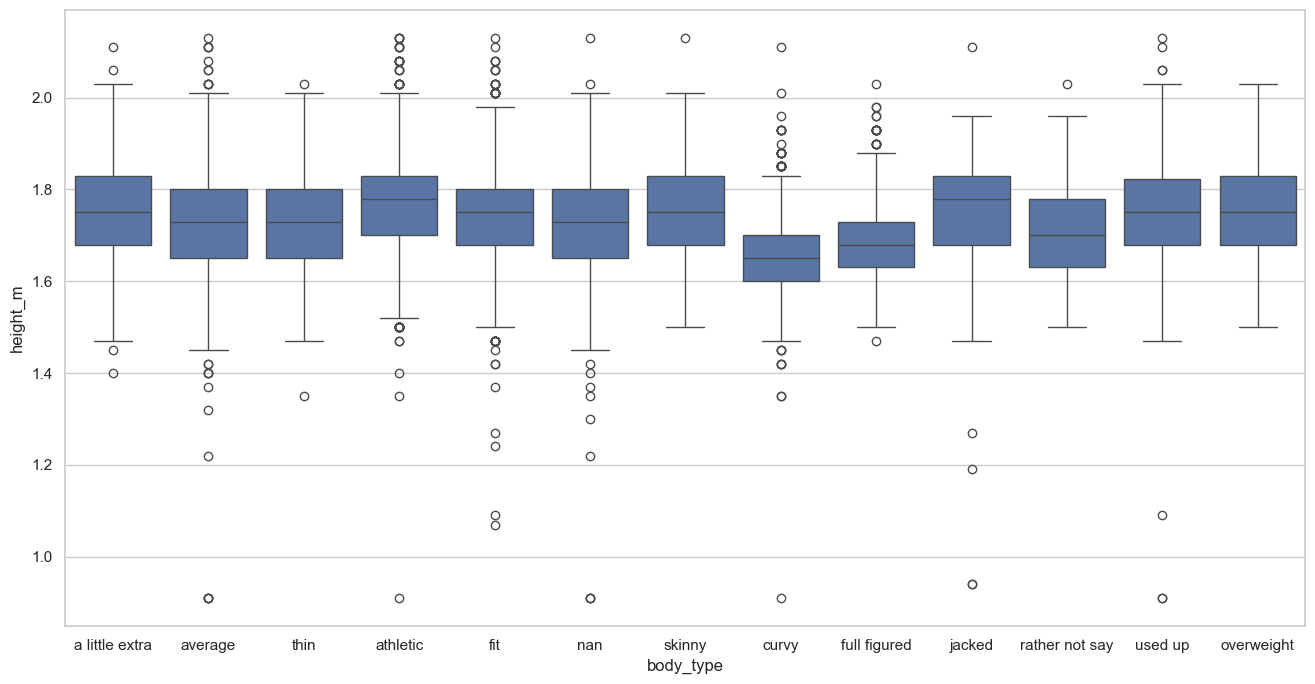

In [40]:
print(data_profile_physics.describe(include='all'))
print(data_profile_physics.isnull().sum())
print(data_profile_physics.head())
sns.heatmap(data_profile_physics[['age', 'height_m', 'sex']].corr(), annot=True, cmap='coolwarm', center=0)
#plt.title('Correlation matrix of the physics features')
plt.show()
